# **Exploratory analysis of the data**

## Extra Preprocessing

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns

In [413]:
def trunc_length(ds, nb_hours):
#function that truncates the data to only consider the first nb_hours hours
    df = ds.loc[ds.index <=  nb_hours]
    return df

def create_batchs(ds):
    batchs = []
    ids = ds.icustay_id.unique()
    for i in ids:
        batchs.append(ds.loc[ds['icustay_id'] == i])
    return batchs

def remove_missing(batch, var, threshold):
#remove from batch the entries where a too large proportion of the variables var are missing 
    res = []
    
    for i in range(len(batch)):
        percent_missing = batch[i].isnull().sum() * 100 / len(batch[i])
        missing_value_df = pandas.DataFrame({'column_name': batch[i].columns,
                                    'percent_missing': percent_missing})
        criterion = np.array([missing_value_df.loc[missing_value_df.column_name == t].percent_missing >= threshold for t in var])
        if criterion.any():
            print('entry removed')
        else:
            res.append(batch[i])
    return res



## Loading the data

In [415]:
nb_hours = 25
list_vit = ['heart_rate', 'oxygen_saturation', 'map']
list_vit_clean = ['Heart Rate', 'Oxygen Saturation', 'MAP']


df = pandas.read_csv('preprocessed_mimic3d_hour.csv', delimiter=',', index_col = "hour_from_intime")
df = trunc_length(df, nb_hours)
bch = create_batchs(df)

## Analysis of missing data

In [416]:
# /!\ code à clean 
import plotly.graph_objects as go

miss_hr = []
miss_spO2 = []
miss_map = []
miss_icp = []
miss_cpp = []
for i in range(len(bch)):
        percent_missing = bch[i].isnull().sum() * 100 / len(bch[i])
        missing_value_df = pandas.DataFrame({'percent_missing': percent_missing})
        miss_hr.append(percent_missing[2])
        miss_spO2.append(percent_missing[3])
        miss_map.append(percent_missing[4])
        miss_icp.append(percent_missing[5])
        miss_cpp.append(percent_missing[6])

fig = go.Figure()
fig.update_layout(xaxis_title='Vitals missing percentage')
fig.add_trace(go.Box(y=miss_hr, boxpoints='all', name = 'Heart rate'))
fig.add_trace(go.Box(y=miss_spO2, boxpoints='all', name = 'spO2'))
fig.add_trace(go.Box(y=miss_map, boxpoints='all', name = 'MAP'))
fig.show()

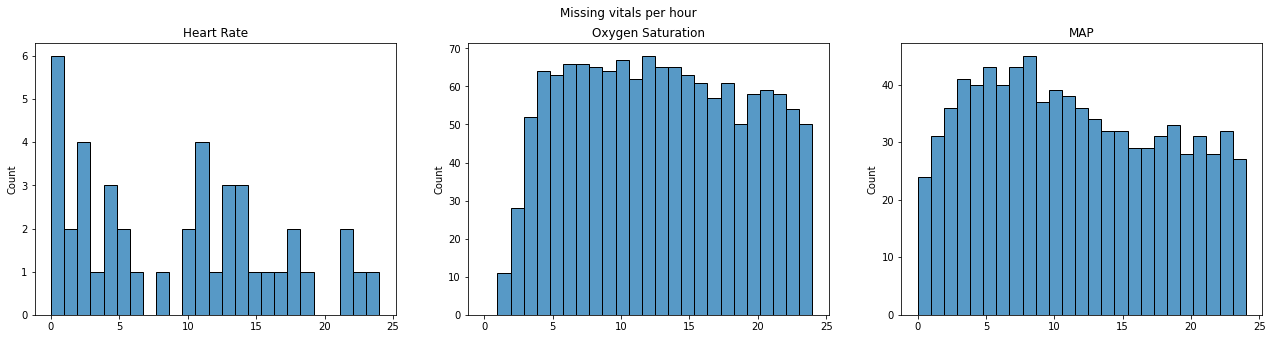

In [417]:
missing_hist = []
for vit in list_vit:
    missing_hist.append([df.loc[i][vit].isnull().sum() for i in range(nb_hours)])

fig, axes = plt.subplots(1,3, figsize=(22, 5))
fig.suptitle('Missing vitals per hour')
for i in range(len(list_vit)):
    sns.histplot(ax = axes[i], x = range(nb_hours), weights =  missing_hist[i], bins = nb_hours)
    axes[i].set_title(list_vit_clean[i])


In [418]:
#Removing missing data 
batchs = remove_missing(bch, ['heart_rate', 'oxygen_saturation', 'map'], threshold = 20)
print(len(batchs))

entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry 

entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
entry removed
16


## Time-series plots - patterns

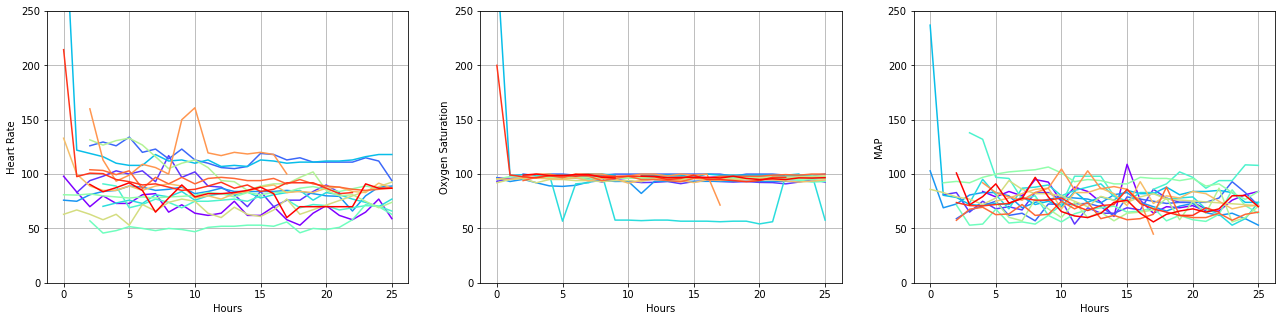

In [419]:
#Simple plots of the variables
fig, axes = plt.subplots(1,3, figsize=(22, 5))
for i in range(len(list_vit)):
    color = iter(cm.rainbow(np.linspace(0, 1, len(batchs))))
    for patient in range(len(batchs)):
        c = next(color)
        batchs[patient][list_vit[i]].plot(ax = axes[i], xlabel = 'Hours', color = c, ylabel = list_vit_clean[i], ylim = [0,250])
        axes[i].grid()


#faire une fonction threshold missing 
#faire une fonction pour chaque patient uqi peut être appliquée à chaque patient 

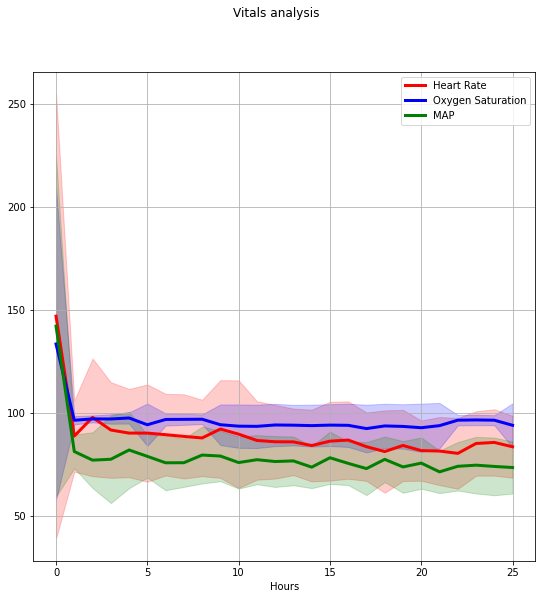

Text(0.5, 0, 'Hours')

In [420]:
import itertools

df = pd.concat(batchs)
agg_mean = (df).groupby(df.index).agg({'heart_rate': np.mean, 'oxygen_saturation': np.mean, 'map': np.mean})
agg_std = (df).groupby(df.index).agg({'heart_rate': np.std, 'oxygen_saturation': np.std, 'map': np.std})
color = itertools.cycle(["r", "b", "g"])

fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('Vitals analysis')
for i in range(len(list_vit)):
    c = next(color)
    ax.plot(range(nb_hours + 1), agg_mean[list_vit[i]], alpha=1, color=c, label=list_vit_clean[i], linewidth = 3.0)
    ax.fill_between(range(nb_hours + 1), agg_mean[list_vit[i]] - agg_std[list_vit[i]], agg_mean[list_vit[i]] + agg_std[list_vit[i]], color=c  , alpha=0.2)
    plt.grid()

ax.legend(loc='best')
ax.set_xlabel("Hours")

## Vitals univariate analysis

In [421]:
fig = go.Figure()
fig.update_layout(xaxis_title='Vitals analysis')
for i in range(len(list_vit)):
    fig.add_trace(go.Box(y=pd.concat(batchs)[list_vit[i]], boxpoints='all', name = list_vit_clean[i]))

fig.show()


## Vitals bivariate analysis

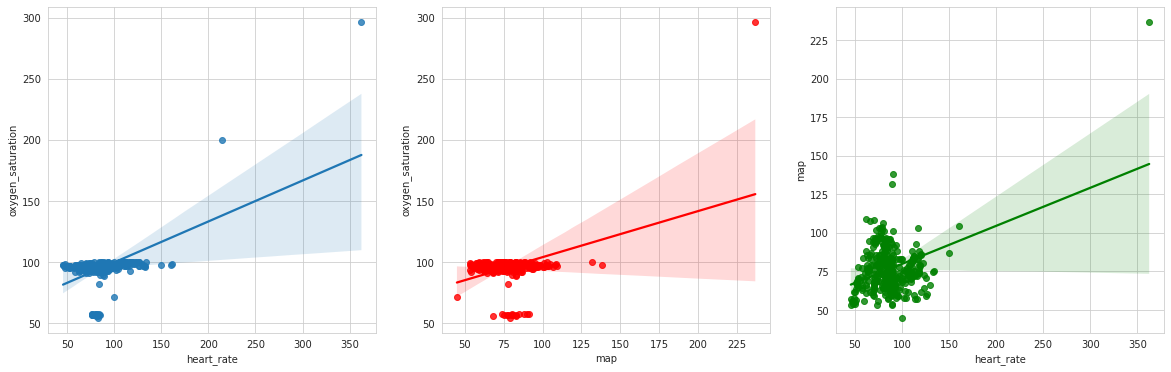

In [332]:
f = plt.figure(figsize=(20, 6))
gs = f.add_gridspec(1, 3)
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0]) 
    sns.regplot(x=list_vit[0], y=list_vit[1], data=pd.concat(batchs))
    ax = f.add_subplot(gs[0, 1]) 
    sns.regplot(x=list_vit[2], y=list_vit[1], data=pd.concat(batchs), color = 'red')
    ax = f.add_subplot(gs[0, 2]) 
    sns.regplot(x=list_vit[0], y=list_vit[2], data=pd.concat(batchs), color = 'green')
    

## Time series analysis on one patient

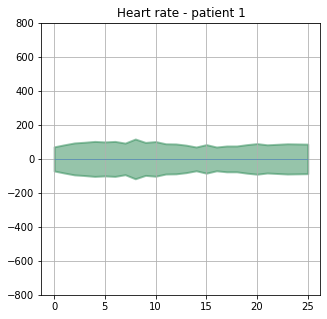

In [422]:
data = interpo[1]
y1 = data['heart_rate']

fig, ax = plt.subplots(1, 1, figsize=(5,5))
plt.fill_between(range(nb_hours + 1), y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.grid()
plt.ylim(-800, 800)
plt.title('Heart rate - patient 1', fontsize=12)
plt.hlines(y=0, xmin=0, xmax=nb_hours, linewidth=.5)
plt.show()

## Data imputation

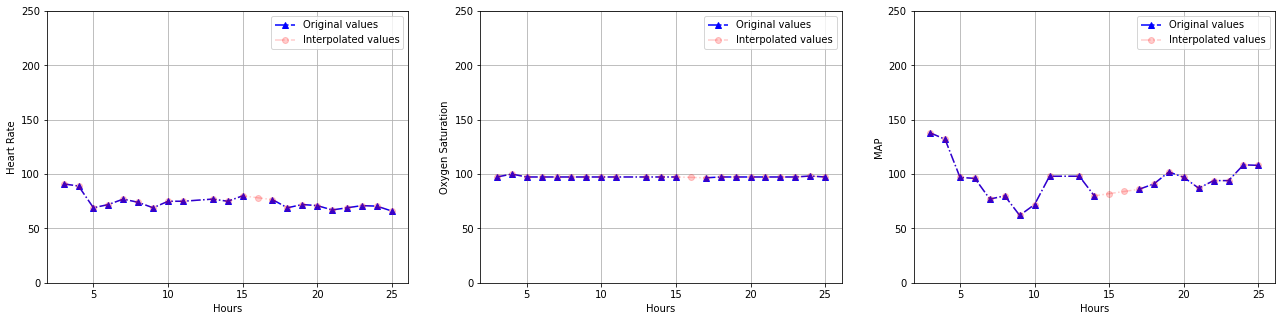

In [423]:
#plot for one patient 
data = pd.concat(batchs)
interpo = data.interpolate()
interpo = create_batchs(interpo)
patient = 6

fig, axes = plt.subplots(1,3, figsize=(22, 5))
for i in range(len(list_vit)):
    batchs[patient][list_vit[i]].plot(ax = axes[i], xlabel = 'Hours',marker='^', linestyle='-.', alpha = 1, color = 'blue', ylabel = list_vit_clean[i], ylim = [0,250])
    interpo[patient][list_vit[i]].plot(x = range(nb_hours),marker='o', ax = axes[i], alpha = 0.2, xlabel = 'Hours', linestyle='-.', color = 'red', ylabel = list_vit_clean[i], ylim = [0,250])
    axes[i].grid()
    axes[i].legend(['Original values', 'Interpolated values'])

## Extraction of labels

In [424]:
label = []
for patient in interpo:
    print(patient)
    label.append([patient.iloc[25][vit] for vit in list_vit])
    patient = patient.drop(25)
    
    print(label)

                  icustay_id           icu_intime  heart_rate  \
hour_from_intime                                                
0                     205589  2117-08-21T08:00:00       98.00   
1                     205589  2117-08-21T08:00:00       83.50   
2                     205589  2117-08-21T08:00:00       70.00   
3                     205589  2117-08-21T08:00:00       80.00   
4                     205589  2117-08-21T08:00:00       73.00   
5                     205589  2117-08-21T08:00:00       73.00   
6                     205589  2117-08-21T08:00:00       81.00   
7                     205589  2117-08-21T08:00:00       82.00   
8                     205589  2117-08-21T08:00:00       65.00   
9                     205589  2117-08-21T08:00:00       71.78   
10                    205589  2117-08-21T08:00:00       64.00   
11                    205589  2117-08-21T08:00:00       62.00   
12                    205589  2117-08-21T08:00:00       64.00   
13                    205

IndexError: single positional indexer is out-of-bounds